In [55]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import roc_curve

In [56]:

df=pd.read_csv("C:\\Users\\garci\\OneDrive\\Área de Trabalho\\Ambiente de trabalho unbunto\\Cienciadedados\\IPL\\BigData\\Trabalho\\datasetlimpo.csv", sep=";")
df

,currency,city_size,card_present,channel,distance_from_home,amounteuro,time,is_fraud
0,4,1,False,0,0,2.447421e+02,46,False
1,1,1,False,2,1,2.135927e+04,80,True
2,5,1,False,2,0,1.655269e+07,105,False
3,0,1,False,0,0,1.034184e+03,106,False
4,7,1,False,2,1,1.178202e+09,121,True
...,...,...,...,...,...,...,...,...
7144856,2,1,False,2,0,6.233964e+02,4464078,False
7144857,9,1,False,2,0,1.685937e+03,4464079,False
7144858,8,1,False,2,1,1.262526e+07,4464091,True
7144859,6,1,False,2,0,1.435414e+05,4464115,False


In [57]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [58]:
X.shape[1]

7

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
class_weights = {0: 1, 1: len(y_train) / (2 * np.sum(y_train == 1))}

In [60]:
#y = to_categorical(y, num_classes=2)
y_train = to_categorical(y_train, num_classes=2)

In [61]:
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)
X = X.reshape(X.shape[0], X.shape[1], 1)
model = models.Sequential()
model.add(layers.Conv1D(64, 2, activation='relu', padding='same', input_shape=(X.shape[1], 1)))  
model.add(MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(128, 2, activation='relu', padding='same')) 
model.add(MaxPooling1D(pool_size=1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,class_weight=class_weights)


Epoch 1/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2129s 14ms/step - accuracy: 0.8743 - loss: 12870.1895
Epoch 2/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 1958s 13ms/step - accuracy: 0.7991 - loss: 0.8663
Epoch 3/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2108s 13ms/step - accuracy: 0.7990 - loss: 0.8664
Epoch 4/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2400s 15ms/step - accuracy: 0.7995 - loss: 0.8656
Epoch 5/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2526s 16ms/step - accuracy: 0.7996 - loss: 0.8653
Epoch 6/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2138s 14ms/step - accuracy: 0.7992 - loss: 0.8660
Epoch 7/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2216s 14ms/step - accuracy: 0.7993 - loss: 0.8660
Epoch 8/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2323s 15ms/step - accuracy: 0.7995 - loss: 0.8654
Epoch 9/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2647s 17ms/step - accuracy: 0.7993 - loss: 0.8659
Epoch 10/10
156294/156294 ━━━━━━━━━━━━━━━━━━━━ 2901s 19ms/step - accuracy: 0.7992 - loss: 0.8661


In [63]:
y_test = to_categorical(y_test, num_classes=2)

In [64]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

66984/66984 ━━━━━━━━━━━━━━━━━━━━ 590s 9ms/step - accuracy: 0.7988 - loss: 0.5861
Test Accuracy: 0.7991554737091064


In [65]:
previsoescnn = model.predict(X_test)

66984/66984 ━━━━━━━━━━━━━━━━━━━━ 517s 8ms/step


In [66]:
model.save("C:\\Users\\garci\\OneDrive\\Área de Trabalho\\Ambiente de trabalho unbunto\\Cienciadedados\\IPL\\BigData\\Trabalho\\CNNbigdata.keras")


In [67]:
model=load_model("C:\\Users\\garci\\OneDrive\\Área de Trabalho\\Ambiente de trabalho unbunto\\Cienciadedados\\IPL\\BigData\\Trabalho\\CNNbigdata.h5")
#model.evaluate(x_test, y_test)

In [68]:
y_test_labels = np.argmax(y_test, axis=1)
y_score_positive = previsoescnn[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_labels, y_score_positive)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: inf


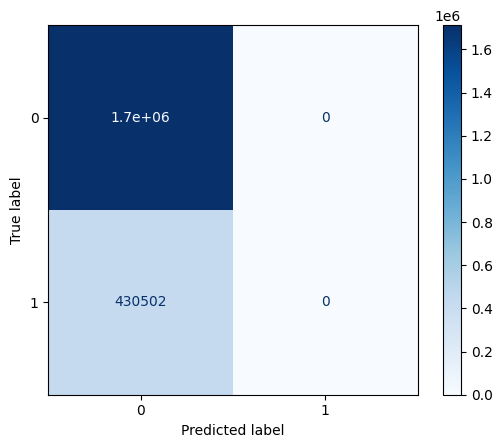

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(previsoescnn, axis=1)
cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')



In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

KeyError: 'val_acc'